In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [12]:
# Read the data
df = pd.read_csv('../../../assets/files/weight_prediction_dataset.csv')
df

,Age,Height_cm,Weight_kg
0,24,112.7,46.8
1,13,104.6,43.9
2,45,127.6,59.3
3,41,130.0,58.0
4,38,129.5,56.9
...,...,...,...
95,56,135.2,62.9
96,38,125.6,57.7
97,27,117.3,56.4
98,75,156.1,80.9


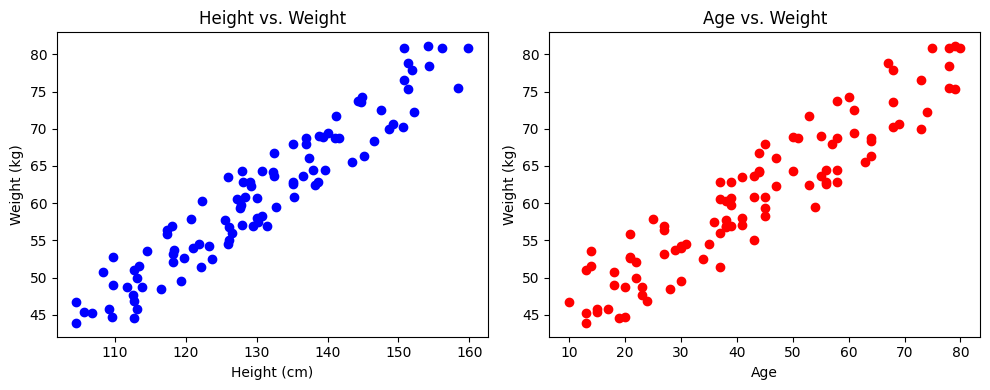

In [14]:
# Plot the data to see how it looks like in 2D

fig, axs = plt.subplots(1, 2, figsize=(10, 4), dpi=100)

# Scatter Plot 1: Height vs. Weight
axs[0].scatter(df['Height_cm'], df['Weight_kg'], c='blue')
axs[0].set_xlabel('Height (cm)')
axs[0].set_ylabel('Weight (kg)')
axs[0].set_title('Height vs. Weight')

# Scatter Plot 2: Age vs. Weight
axs[1].scatter(df['Age'], df['Weight_kg'], c='red')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Weight (kg)')
axs[1].set_title('Age vs. Weight')

# Adjust layout
plt.tight_layout()
plt.show()


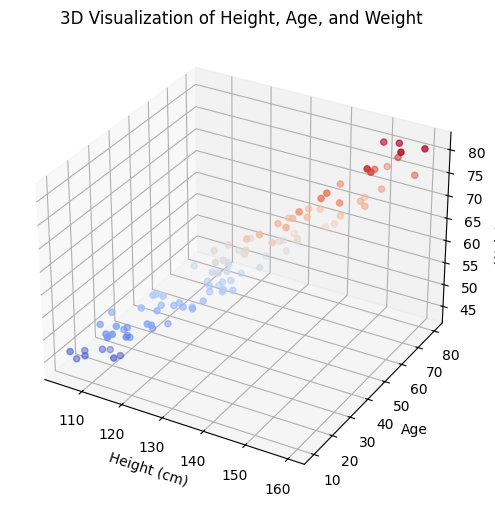

In [18]:
# Plot in 3D

fig = plt.figure(figsize=(8,6), dpi=100)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Height_cm'], df['Age'], df['Weight_kg'], c=df['Weight_kg'], cmap='coolwarm')

ax.set_xlabel('Height (cm)')
ax.set_ylabel('Age')
ax.set_zlabel('Weight (kg)')
ax.set_title('3D Visualization of Height, Age, and Weight')

plt.show()

In [19]:
# Process the data for linear regression

X = df[['Height_cm', 'Age']]
y = df['Weight_kg']

X_processed = X.values
y_processed = y.values.reshape(-1, 1)  # `-1` is to infer the number of rows, `1` means "1 column"; [-40, 0] will be converted to [[-40], [0]]

In [20]:
# Train the linear regression model

model = LinearRegression()
model.fit(X_processed, y_processed)

LinearRegression()

In [23]:
# Check the existing values

height_for_prediction = 104.6
age_for_prediction = 10

prediction = model.predict(np.array([[height_for_prediction, age_for_prediction]]))

print(f"A person with the height of {height_for_prediction}cm and age of {age_for_prediction} years old is estimated to weight {round(prediction[0][0],2)} Kg.")

A person with the height of 104.6cm and age of 10 years old is estimated to weight 43.98 Kg.


In [25]:
# Check the score

score = model.score(X_processed, y_processed)
score

0.909781264586894